/home/sidsel/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2787: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Kolonnenavn: Name                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Age                  antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Nationality          antal fyldte felter: 17981     datatype: object
Kolonnenavn: Overall              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Potential            antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Club                 antal fyldte felter: 17733     datatype: object
Kolonnenavn: Value                antal fyldte felter: 17981     datatype: object
Kolonnenavn: Wage                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Special              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Acceleration         antal fyldte felter: 17981     datatype: object
Kolonnenavn: Aggression           antal fyldte felter: 17981     datatype: object
Kolonnenavn: Agility              antal fyldte felter: 17981     datatype: object
Kolonnenavn: Balance

Teknisk Tirsdag - Data Cleaning.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cell_type": "markdown",
Teknisk Tirsdag - Data Cleaning.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
Teknisk Tirsdag - Data Cleaning.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [


Variablenavn: Name                 Variabletype: object
Variablenavn: Age                  Variabletype: int64
Variablenavn: Nationality          Variabletype: object
Variablenavn: Overall              Variabletype: int64
Variablenavn: Potential            Variabletype: int64
Variablenavn: Club                 Variabletype: object
Variablenavn: Value                Variabletype: float64
Variablenavn: Wage                 Variabletype: float64
Variablenavn: Special              Variabletype: int64
Variablenavn: Acceleration         Variabletype: float64
Variablenavn: Aggression           Variabletype: float64
Variablenavn: Agility              Variabletype: float64
Variablenavn: Balance              Variabletype: float64
Variablenavn: Ball control         Variabletype: float64
Variablenavn: Composure            Variabletype: float64
Variablenavn: Crossing             Variabletype: float64
Variablenavn: Curve                Variabletype: float64
Variablenavn: Dribbling            Variabl

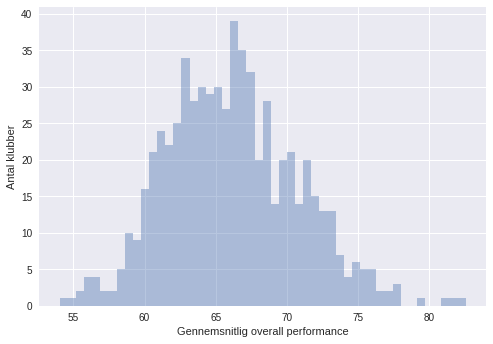

Træningsæt størrelse: 1272


In [1]:
# Run the datacleaning notebook to get all the variables
%run 'Teknisk Tirsdag - Data Cleaning.ipynb'

Efter at have hentet vores rensede data, hvor vi minder os selv om, at vi har: <br>
* dansker_set
* topklub_set
* ikke_topklub_set
* overall_set 

Først er vil vi gerne kigge lidt på, om vi var grundige nok i vores foranalyse. Derfor laver vi et heatmap, der skal fortælle os noget om vores kolonner i forhold til hinanden.

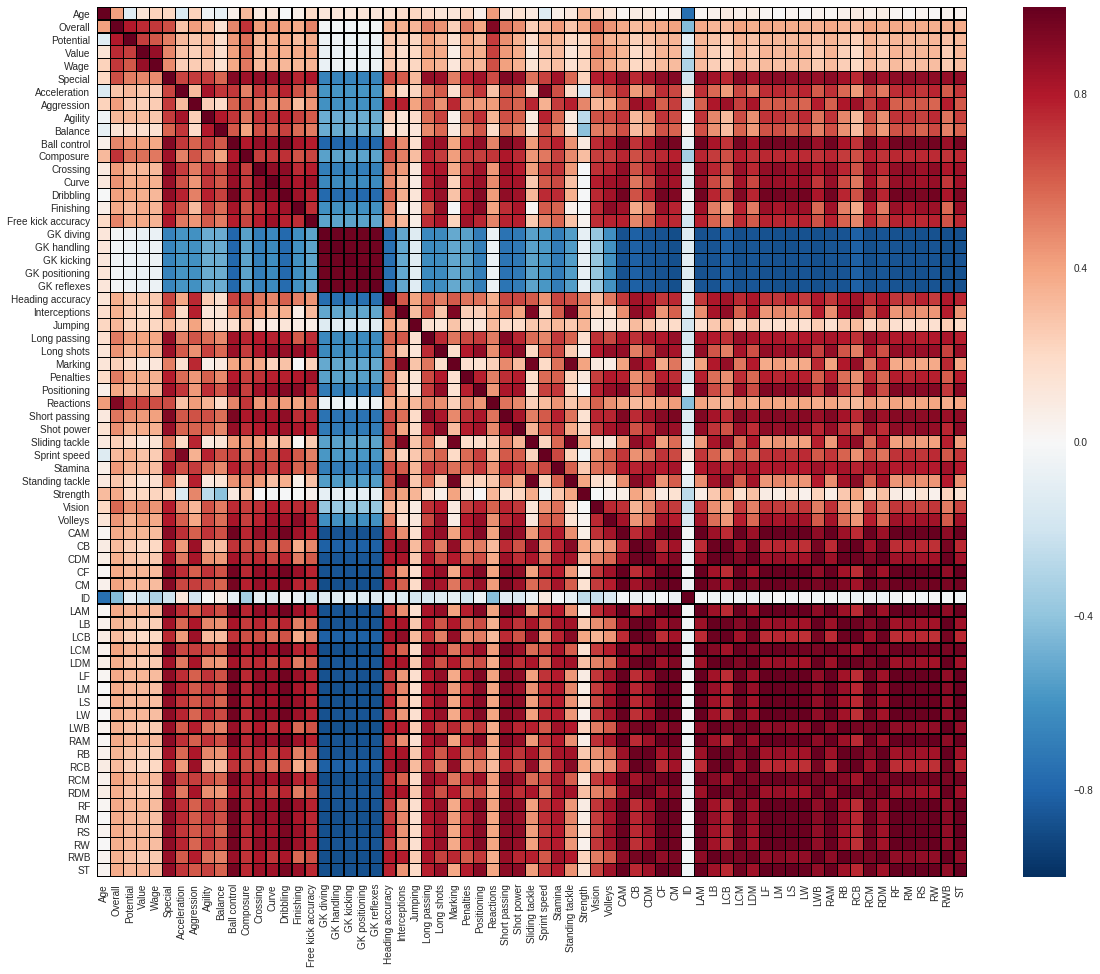

In [2]:
corr = overall_set.corr()

fig = plt.figure(figsize=(20,16))

ax = sb.heatmap(corr, 
                 xticklabels=corr.columns.values,
                 yticklabels=corr.columns.values,
                 linewidths=0.25,
                 vmax=1.0, 
                 square=True, 
                 linecolor='black', 
                 annot=False
                )
plt.show()

Hvad vi ser her, er en korrelationsmatrix. Jo varmere farver, des mere korrelation. <br>
Vi ser altså at der er meget korrelation i vores nedre højre hjørne. Dette er spilpositionerne. Vi ser også et stort blåt kryds, som her er målmandsdata. Disse har meget lidt korrelation med resten af vores datasæt. (Dobbelt klik evt. på plottet, hvis det er meget svært at læse teksten)<br>
Derudover kan vi se, at ID kolonnen slet ikke korrelere. Man kan derfor vælge at tage den ud.

Vi tilføjer nu vores "kendte" labels til vores data. (Hvis man spiller for en af vores topklubber, får man et 1-tal, og ellers får man et 0) <br>
Vi dele også vores træningssæt op i en *X* matrix med alle vores numeriske features, og en *y* vektor med alle vores labels.

In [3]:
overall_set['label'] = overall_set['Club'].isin(topklub_set.Club).astype(int)
y = overall_set['label']
X = overall_set.iloc[:,0:-1].select_dtypes(include=['float64', 'int64'])

Vi kan kigge lidt overordnet på tallene mellem de 2 klasser

In [4]:
overall_set.groupby('label').mean()

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
label,,,,,,,,,,,,,,,,,,,,,
0,25.212264,66.037736,71.042453,1.848137e+06,9393.081761,1579.055031,63.639937,54.816038,62.603774,63.509434,...,49.641509,48.553459,50.836478,49.632075,51.089623,52.004717,50.356918,51.333333,50.194969,50.356918
1,25.166667,77.099057,81.856918,1.630118e+07,71496.855346,1817.268868,69.382075,62.413522,68.784591,66.122642,...,58.400943,56.378931,61.515723,58.900943,61.589623,62.281447,60.044025,61.707547,59.371069,60.044025


### Observationer
* Alderen siger ikke rigtig noget om, hvorvidt du spiller for en topklub eller ej
* Topklub spillere er en faktor 10 mere værd end ikke-topklub spillere
* Topklub spillere er generelt ca. 10+ på alt i forhold til ikke-topklub spillere

Vi er nu klar til at gå i gang med vores første Machine Learning algoritme.
Vi ved på forhånd, at der i vores træningssæt er {{y.where(y==1).count()}} der spiller i topklubber, og {{y.where(y==0).count()}} der ikke gør. <br>
Der er en 50/50 chance for at ramme rigtigt, hvis man bare gætte tilfældigt. Vi håber derfor, at algoritmen kan slå den 50% svarrate.

### Logistisk regression

In [5]:
# hent nødvendige pakker fra Scikit Learn biblioteket (generelt super hvis man vil lave data science)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Vi fitter nu en logistic regression classifier til vores data, og fitter en model, så den kan genkende om man spiller for en topklub eller ej, og evaluere resultatet:

In [6]:
model = LogisticRegression()
model = model.fit(X,y)

model.score(X,y)

0.83569182389937102

Altså har vores model ret i 
{{'{:.0f}'.format(100*model.score(X, y))}}% af tiden i træningssættet. <br>

Pretty good!! Den har altså fundet nogle mønstre der kan mappe data til labels, og gætter ikke bare.

Men vi kan ikke vide, om den har overfittet, og derved har tilpasset sig for godt til sit kendte data, så nyt data vil blive fejlmappet. <br>
Hvad vi kan prøve er at splitte vores træningssæt op i et trænings- OG testsæt. På den måde kan vi først fitte og derefter evaluere på "nyt" kendt data, om den stadig performer som forventet. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Træningsæt størrelse: {} - Testsæt størrelse: {}'.format(len(X_train), len(X_test)))

Træningsæt størrelse: 1017 - Testsæt størrelse: 255


Og vi er nu klar til at prøve igen !

## Logistic regression 2.0

Igen fitter vi en logistic regression til vores træningsdata, og fitter en model. Men denne gang uden at involvere testsættet.

In [8]:
model2 = LogisticRegression()
model2 = model2.fit(X_train, y_train)
model2.score(X_train, y_train)

0.83087512291052112

Modellen matcher nu 
{{'{:.0f}'.format(100*model2.score(X, y))}}% af tiden i træningssættet. <br> 
Men har den overfittet?

### Evaluering af modellen

Vi generere derfor vores *y* prediktioner og også sandsynlighederne for disse

In [9]:
y_pred = model2.predict(X_test)
y_probs = model2.predict_proba(X_test)

In [10]:
# Evalueringsmålinger
from sklearn import metrics
print('Nøjagtigheden af vores logistiske regressions models prediction på testsættet er {:.0f}'.format(100*metrics.accuracy_score(y_test, y_pred))+'%', '\n')
print('Arealet under vores ROC AUC kurve er {:.0f}'.format(100*metrics.roc_auc_score(y_test, y_probs[:, 1]))+'%')

Nøjagtigheden af vores logistiske regressions models prediction på testsættet er 86% 

Arealet under vores ROC AUC kurve er 92%


Det ser jo ret fornuftigt ud.<br>

For at sige noget om vores nye model, kan vi også lave en "confusion_matrix"

<img src='http://revolution-computing.typepad.com/.a/6a010534b1db25970b01bb08c97955970d-pi',
    align="center"
    width="40%"
    alt="confusion matrix">
    
T og F står for henholdsvist True og False<br>
P og N står for henholdsvist Positive og Negative

In [11]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[118  12]
 [ 24 101]]


Resultatet fortæller os, at vi har {{confusion_matrix[0,0]}}+{{confusion_matrix[1,1]}} = {{confusion_matrix[0,0]+confusion_matrix[1,1]}} korrekte forudsigelser og {{confusion_matrix[0,1]}}+{{confusion_matrix[1,0]}} = {{confusion_matrix[0,1]+confusion_matrix[1,0]}} ukorrekte

Man kan også bede classifieren om en rapport:

In [12]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.91      0.87       130
          1       0.89      0.81      0.85       125

avg / total       0.86      0.86      0.86       255



### Logistisk regression med krydsvalidering

Vi er egentlig meget tilfredse med vores model, men ofte kan det være en god idé at teste på flere små testsæt, og holde dem op mod hinanden. <br>

Her laver vi en 10-folds krydsvalidering og får altså 10 scorer ud:

In [14]:
# 10-folds cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores,'\n')
print(scores.mean())

[ 0.96875     0.921875    0.9609375   0.9609375   0.9765625   0.9140625
  0.91269841  0.75396825  0.44444444  0.46031746] 

0.827455357143


Her preformer modellen altså i gennemsnit 
{{'{:.0f}'.format(100*scores.mean())}}%. 

Det lyder meget lovende, men vi holder os til vores *model2* og kan nu prøve modellen af på det rigtige datasæt

# Danskersættet 
Vi kan nu lave prediction og probability på vores danske spillere.<br>
Først laver vi en dataframe der kun indeholder de numeriske værdier, og så laver vi vores prediction og sandsynligheder, ligesom vi gjorde tidligere for testsættet

In [15]:
dansker_pred = model2.predict(dansker_set.select_dtypes(include=['float64', 'int64']))
dansker_probs = model2.predict_proba(dansker_set.select_dtypes(include=['float64', 'int64']))

Vi tilføjer disse kolonner til vores dataframe

In [16]:
dansker_set['Probabilities [0,1]'] = dansker_probs.tolist()
dansker_set['Prediction'] = pd.Series(dansker_pred, index=dansker_set.index)

/home/sidsel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sidsel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Vi sortere listen, så de bedste danske spillere står øvers, og tilføjer et index, så vi kan få et bedre overblik

In [20]:
dansker_set.loc[:,'pred=1'] = dansker_set['Probabilities [0,1]'].map(lambda x: x[1]).sort_values(ascending=False)
dansker_sorted = dansker_set.sort_values('pred=1', ascending=False)
dansker_sorted = dansker_sorted[['Name', 'Club', 'Overall', 'Potential', 'Probabilities [0,1]', 'Prediction']]
dansker_sorted.loc[:,'in'] = np.arange(1, len(dansker_set)+1)
dansker_sorted.set_index('in')

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Name,Club,Overall,Potential,"Probabilities [0,1]",Prediction
in,,,,,,
1,C. Eriksen,Tottenham Hotspur,87,91,"[5.388461900013297e-07, 0.99999946115381]",1
2,A. Christensen,Chelsea,81,89,"[0.007575822103182195, 0.9924241778968178]",1
3,K. Schmeichel,Leicester City,83,84,"[0.019318008930466646, 0.9806819910695334]",1
4,D. Wass,RC Celta de Vigo,80,80,"[0.11280435736931493, 0.8871956426306851]",1
5,Y. Poulsen,RB Leipzig,76,83,"[0.11298621598651326, 0.8870137840134867]",1
6,J. Vestergaard,Borussia Mönchengladbach,79,84,"[0.12739959095157738, 0.8726004090484226]",1
7,S. Kjær,Sevilla FC,81,82,"[0.12873877286188196, 0.871261227138118]",1
8,N. Jørgensen,Feyenoord,79,81,"[0.14940022803762587, 0.8505997719623741]",1
9,P. Højbjerg,Southampton,75,81,"[0.18351302995208163, 0.8164869700479184]",1


Efter flot hattrick mod Irland, kan man vidst ikke være i tvivl om Kong Christian tager pladsen på tronen
<img src='kongen.png',
    align="center"
    width="40%"
    alt="kongen">

Men hvilke danske spillere spiller egentlig for topklubber, og hvordan er de rangeret i forhold til vores model?

In [21]:
dansker_sorted[dansker_sorted['Club'].isin(top_clubs)].set_index('in')

,Name,Club,Overall,Potential,"Probabilities [0,1]",Prediction
in,,,,,,
2,A. Christensen,Chelsea,81,89,"[0.007575822103182195, 0.9924241778968178]",1
7,S. Kjær,Sevilla FC,81,82,"[0.12873877286188196, 0.871261227138118]",1
17,M. Krohn-Dehli,Sevilla FC,79,79,"[0.3580321213127231, 0.6419678786872769]",1
200,J. Larsen,Borussia Dortmund,62,79,"[0.8222710114151601, 0.17772898858483982]",0
223,R. Corlu,Roma,58,69,"[0.8342589108405751, 0.16574108915942493]",0


Man kan undre sig over hvad Jacob Larsen laver hos stopklubben Borussia Dortmund, men en hurtig googling viser, at han simpelthen blev headhuntet til klubben som 16-årig.

Og så er der jo nok nogen, der vil spørger... Hvad med Bendtner?
Så han skal da også lige have en plads i vores analyse:

In [22]:
dansker_sorted.loc[dansker_sorted.Name == 'N. Bendtner'].set_index('in')

,Name,Club,Overall,Potential,"Probabilities [0,1]",Prediction
in,,,,,,
40,N. Bendtner,Rosenborg BK,73,73,"[0.5870555783461053, 0.4129444216538947]",0


Vi kan også kigge på ham i det store billede. Prøv evt. at lege lidt rundt med forskellige spillere

In [23]:
df.loc[df.Name == 'N. Bendtner']

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2697,N. Bendtner,29,Denmark,73,73,Rosenborg BK,4000000.0,10000.0,1790,70.0,...,51.0,51.0,65.0,54.0,70.0,69.0,72.0,69.0,53.0,72.0


# Forslag til opgaver? 

Kan de måske kigge rundt i forskellige plots?
Lidt længere nede ses at der er MEGET stor lønforskel på DK's bedste og anden bedste spiller - på trods af at det kun er nr. 2 der spiller for "en topklub"

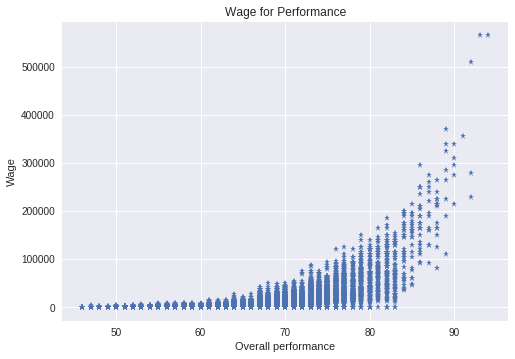

In [31]:
plt.plot(df.Overall, df.Wage, '*')

plt.xlabel('Overall performance')
plt.ylabel('Wage')
plt.title('Wage for Performance')

plt.show()

In [33]:
df[df.Wage > 500000]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228,89.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154,92.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291,88.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0


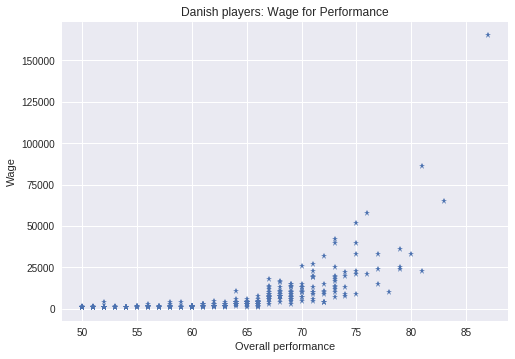

In [36]:
plt.plot(dansker_set.Overall, dansker_set.Wage, '*')

plt.xlabel('Overall performance')
plt.ylabel('Wage')
plt.title('Danish players: Wage for Performance')

plt.show()

In [55]:
dansker_set[dansker_set['Wage'] > 75000]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RDM,RF,RM,RS,RW,RWB,ST,"Probabilities [0,1]",Prediction,pred=1
36,C. Eriksen,25,Denmark,87,91,Tottenham Hotspur,65000000.0,165000.0,2064,77.0,...,68.0,82.0,84.0,77.0,83.0,69.0,77.0,"[5.388461900013297e-07, 0.99999946115381]",1,0.999999
309,A. Christensen,21,Denmark,81,89,Chelsea,23000000.0,86000.0,1720,70.0,...,77.0,58.0,64.0,55.0,60.0,74.0,55.0,"[0.007575822103182195, 0.9924241778968178]",1,0.992424


Eller kigge på om data er normalt fordelt i forhold til forskellige kolonner?

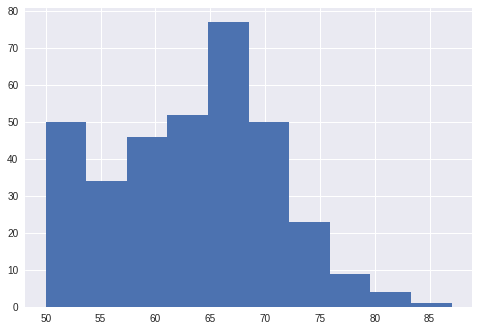

In [54]:
dansker_set.Overall.hist()
plt.show()

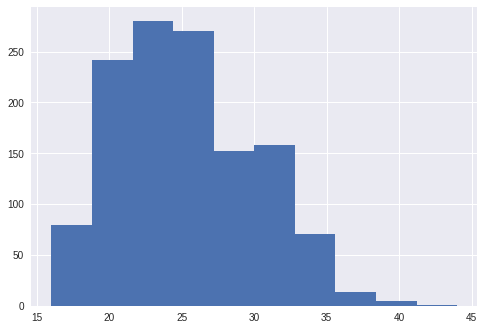

In [53]:
overall_set.Age.hist()
plt.show()